In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
dry_bean = fetch_ucirepo(id=602)
X = dry_bean.data.features
y = dry_bean.data.targets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
scaler = MinMaxScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[0.09359255, 0.14810214, 0.13795034, ..., 0.59276923, 0.68019383,
        0.99372635],
       [0.20421783, 0.38606363, 0.33636012, ..., 0.25059563, 0.38865068,
        0.74323062],
       [0.07445046, 0.1258417 , 0.11675482, ..., 0.61395108, 0.65286389,
        0.97165567],
       ...,
       [0.61720952, 0.70291584, 0.70636078, ..., 0.09589723, 0.38869888,
        0.87769434],
       [0.06854942, 0.11308799, 0.09048658, ..., 0.73768965, 0.77517754,
        0.98482552],
       [0.17641634, 0.32991746, 0.40592435, ..., 0.10825915, 0.09567081,
        0.86600528]])

In [10]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X = X_train, y = y_train)

c:\Dev\ML-LAB\LAB-Study\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [11]:
y_pred = model.predict(X_test)

In [12]:
y_test_bin =label_binarize(y_test, classes = model.classes_)
y_pred_bin = label_binarize(y_pred, classes = model.classes_)

In [15]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [22]:
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [25]:
import matplotlib.pyplot as plt

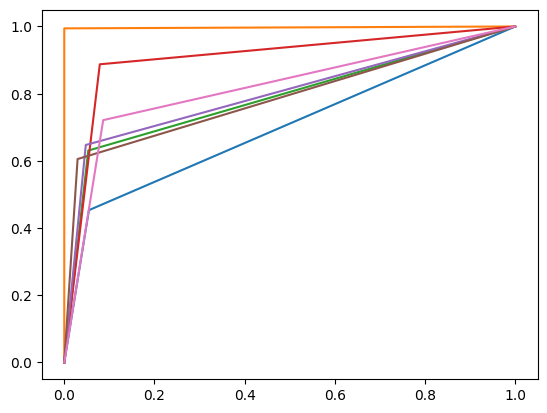

In [28]:
for i in range(len(model.classes_)):
    plt.plot(fpr[i], tpr[i])



In [29]:
from sklearn.metrics import confusion_matrix

In [40]:
conf_matrix = confusion_matrix(y_pred = y_pred, y_true = y_test)

In [2]:
import seaborn as sns

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)

NameError: name 'conf_matrix' is not defined